<a href="https://colab.research.google.com/github/matheus-ramos-medeiros/ProjetoEstudantes/blob/main/Projeto_Estudante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Estudante

**Sobre o conjunto de dados :** Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.

**Introdução :** Vamos analisar o nossos dados, se tem alguma relação entre os grupos de raça, gênero, formação acadêmica dos pais influenciam nas notas.

## Base de dados

Nossa base de dados foi retirada do Kaggle.

[Download dos Dados](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [11]:
#importando os pacotes
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Acessando o Meu Drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
#Lendo o meu arquivo
df = pd.read_csv('/gdrive/MyDrive/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Dimensão

In [5]:
#Dimensões
print('A nossa base tem',df.shape[0],'linhas e', df.shape[1],'colunas.')

A nossa base tem 1000 linhas e 8 colunas.


In [6]:
#colunas
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Valores Ausentes

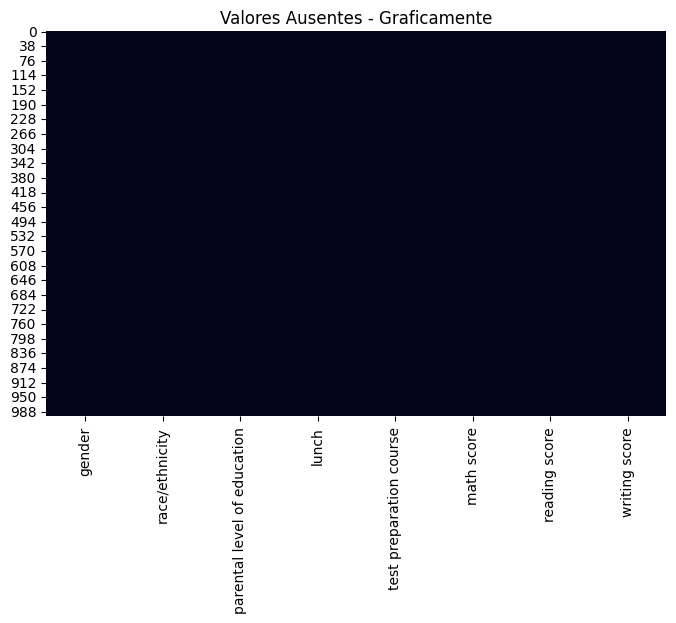

In [7]:
Valores_Ausentes = df.isnull()

plt.figure(figsize=(8,5))
plt.title("Valores Ausentes - Graficamente")
sns.heatmap(Valores_Ausentes,cbar = False);

Vemos que não temos nenhum valor ausente na nossa base de dados.

## Valores únicos


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Podemos analisar quantos valores únicos cada coluna tem do nosso data frame.

## Duplicidade

In [9]:
df.duplicated().sum()

0

Vemos que não existe duplicidade na nossa base de dados.

## Estatística

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Análise

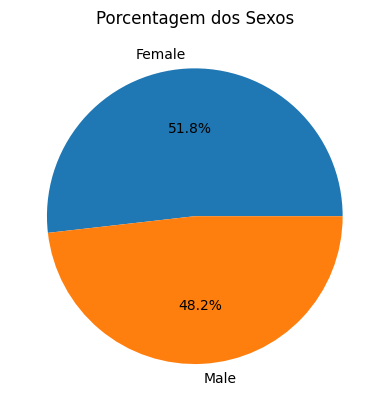

In [12]:
#verificando o peso dos sexos
base_pie = df.gender.value_counts(normalize = True)*100
 
y = [base_pie[0],base_pie[1]]
mylabels = ['Female', 'Male']
plt.title('Porcentagem dos Sexos')
plt.pie( y, labels = mylabels,autopct='%1.1f%%');

In [29]:
#verificando os grupos de raça e etnia
df.grupos = df['race/ethnicity'].value_counts(normalize = True)*100
df.grupos

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [30]:
df['parental level of education'].value_counts( normalize=True )*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [31]:
df['test preparation course'].value_counts( normalize=True )*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

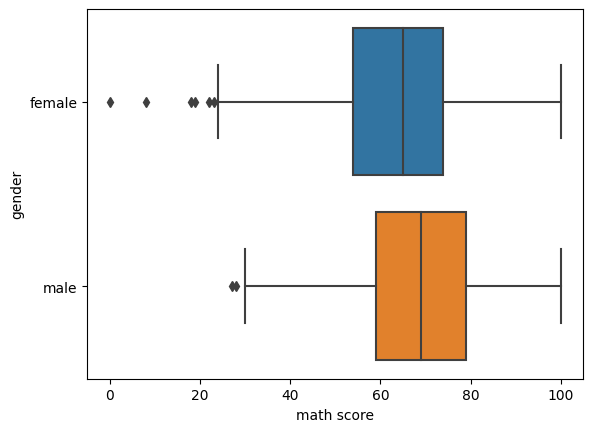

In [34]:
sns.boxplot( data=df, x='math score', y='gender');

Podemos analisar que nas notas de matemática entre os gêneros, o masculino se sai um pouco melhor que as mulheres, podemos perceber que temos muitos outliers que puxam as métricas para baixo, vamos analisar agora vendo os números absloutos.

In [45]:
df.groupby(by = ['gender']).describe()['math score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


A diferença do 'min' faz com que o gênero feminino tenha um desempenho pior.

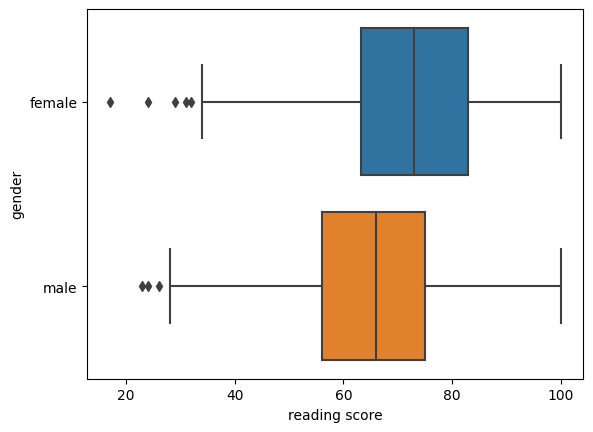

In [37]:
sns.boxplot( data=df, x='reading score', y='gender');

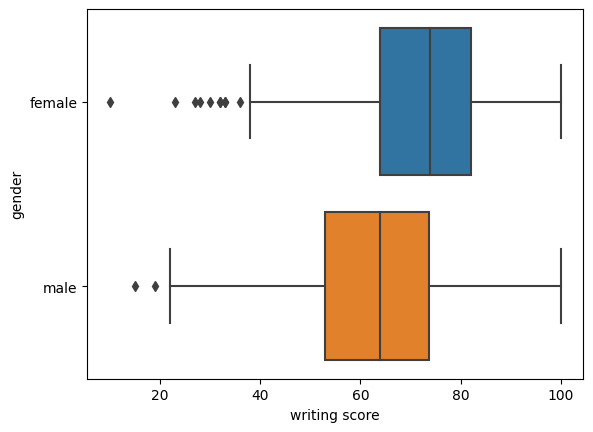

In [39]:
sns.boxplot( data=df, x='writing score', y='gender');

Analisando as provas de leitura e redação o grupo femenino foi melhor, mesmo tendo bastante outilers, pois o limite inferior do grupo femenino é maior que o masculino. 

Vamos analisar as provas pelos grupo de raça/etnia.

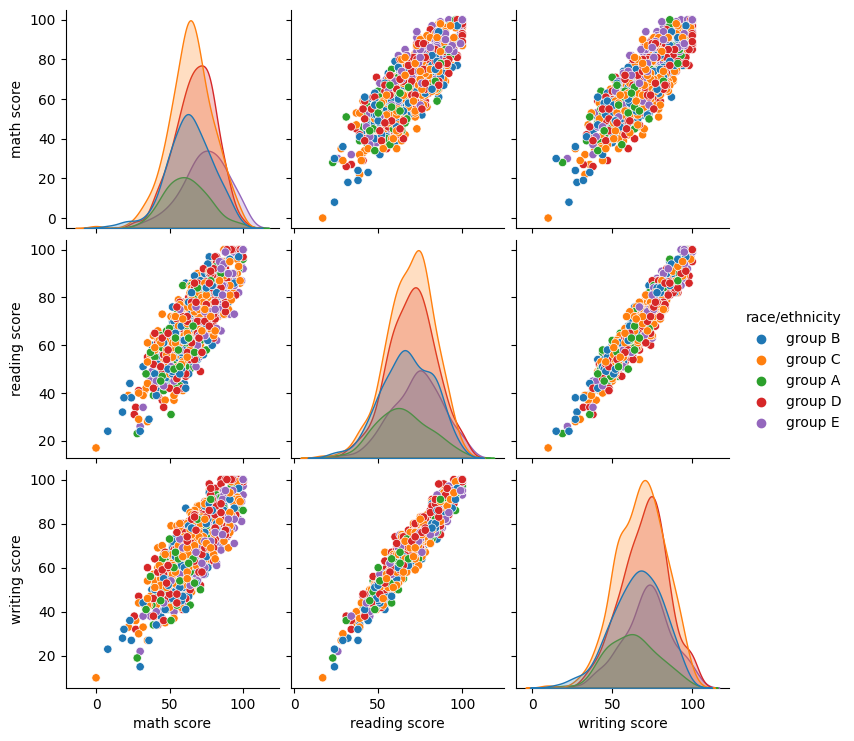

In [47]:
sns.pairplot( df, hue='race/ethnicity' );

Não ficou muito claro as correlações dos grupos e já tinhamos visto a quantidade por grupo antes.

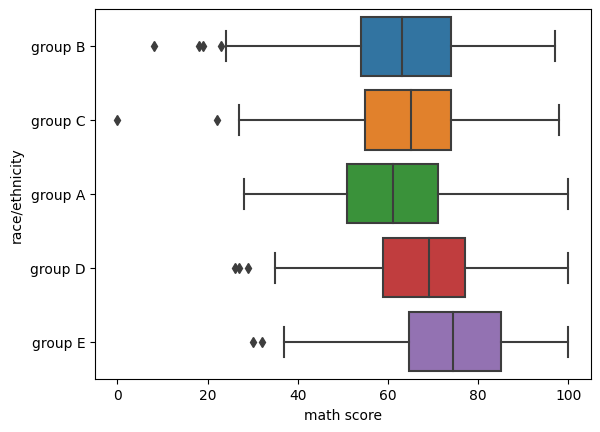

In [49]:
sns.boxplot(data=df,x='math score',y='race/ethnicity');

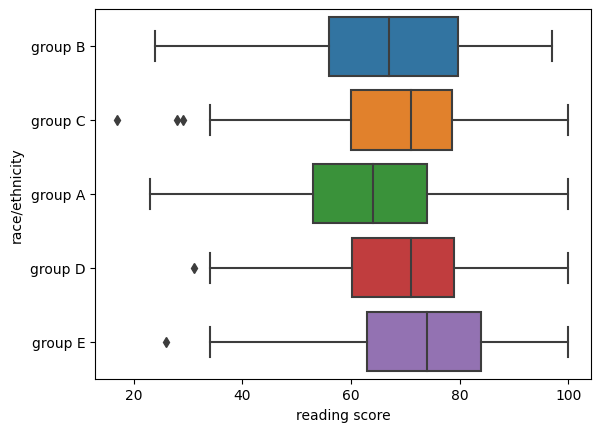

In [50]:
sns.boxplot(data=df,x='reading score',y='race/ethnicity');

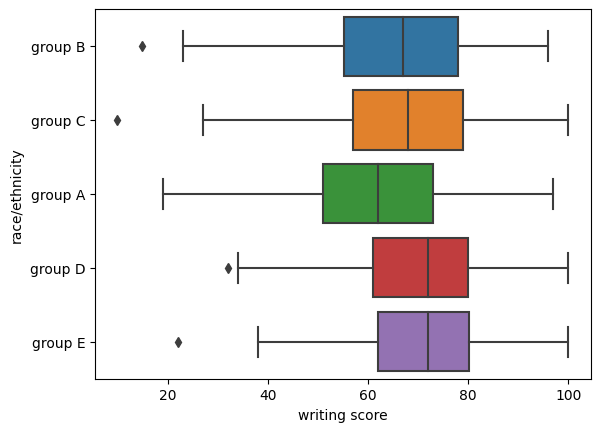

In [51]:
sns.boxplot(data=df,x='writing score',y='race/ethnicity');

Vemos que o grupo E se destacou mais na prova de matemática, entre outras provas ficou mais equilibrado entre todos os grupos.

Vamos olhar a prova de matematica de acordo com o grupo acadêmico.

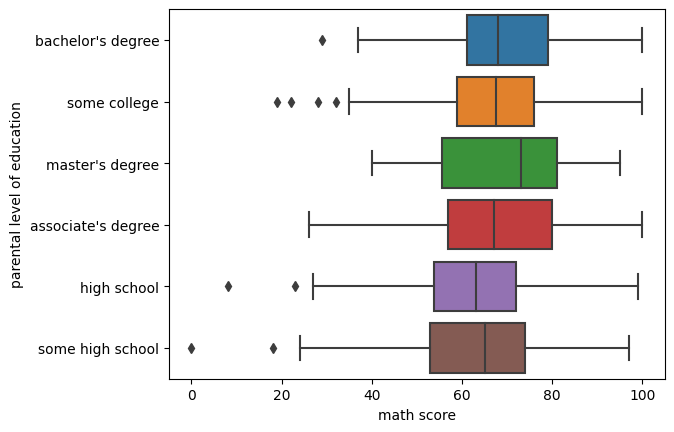

In [53]:
sns.boxplot( data=df, x='math score', y='parental level of education');

Vemos que não necessariamente os pais que tem mestrado pro exemplo irão tirar a maior nota em realção aos outros.

Vamos analisar melhor olhando a tabela abaixo.

In [54]:
df.groupby( by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


Vemos que quem tirou as menores notas são do grupo 'high school'.

Vamos analisar quem se preparou para prova se foi realmente melhor.

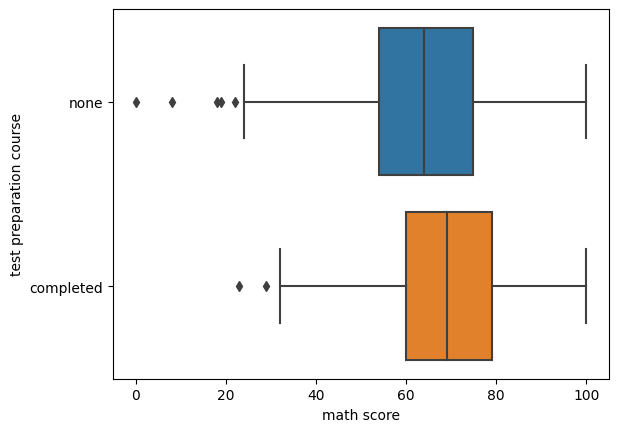

In [19]:
sns.boxplot( data=df, x='math score', y='test preparation course');

Olhando o gráfico acima, precebe-se que quem se preparou para prova tirou a maior nota em matemática.

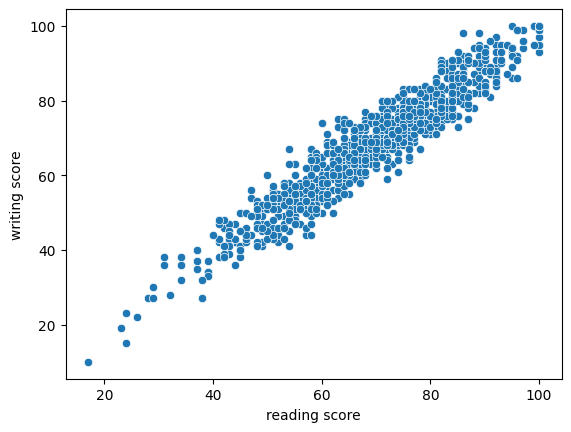

In [21]:
sns.scatterplot( data=df, x='reading score', y='writing score');

Com base nas análises realizadas, podemos concluir que há algumas diferenças nos resultados obtidos em relação ao gênero dos estudantes. Notamos que, em geral, as mulheres tiveram um desempenho melhor nas provas de 'leitura' e 'escrita', enquanto os homens obtiveram notas mais altas na prova de 'matemática'.

Em relação à variável 'raça/etnia', observamos que o 'grupo A' apresentou o pior desempenho em geral, enquanto o 'grupo E' apresentou um desempenho melhor na prova de 'matemática', mas nas outras provas foram equilibrados.

Quanto à escolaridade dos pais, observamos que o grupo com nível de ensino 'ensino médio' teve um desempenho inferior na prova de 'matemática', embora os resultados tenham se mantido equilibrados em outras provas.

É importante ressaltar que essas conclusões são baseadas nos dados analisados e podem ser aprimoradas com uma análise mais detalhada e a consideração de outros fatores relevantes. 

Além disso, as informações sobre a correlação positiva entre as notas em 'escrita' e 'leitura' podem indicar uma possível relação entre essas habilidades.

Esses resultados contribuem para a compreensão dos possíveis impactos do gênero, raça/etnia e nível de escolaridade dos pais no desempenho dos estudantes, auxiliando na identificação de áreas que podem necessitar de intervenções específicas visando a promoção de uma educação mais equitativa.